<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/sklearn/5_Regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['Price'] = housing.target
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_df = housing_df.drop(columns = ['Latitude', 'Longitude'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [ ]:
housing.feature_names[:-2]

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

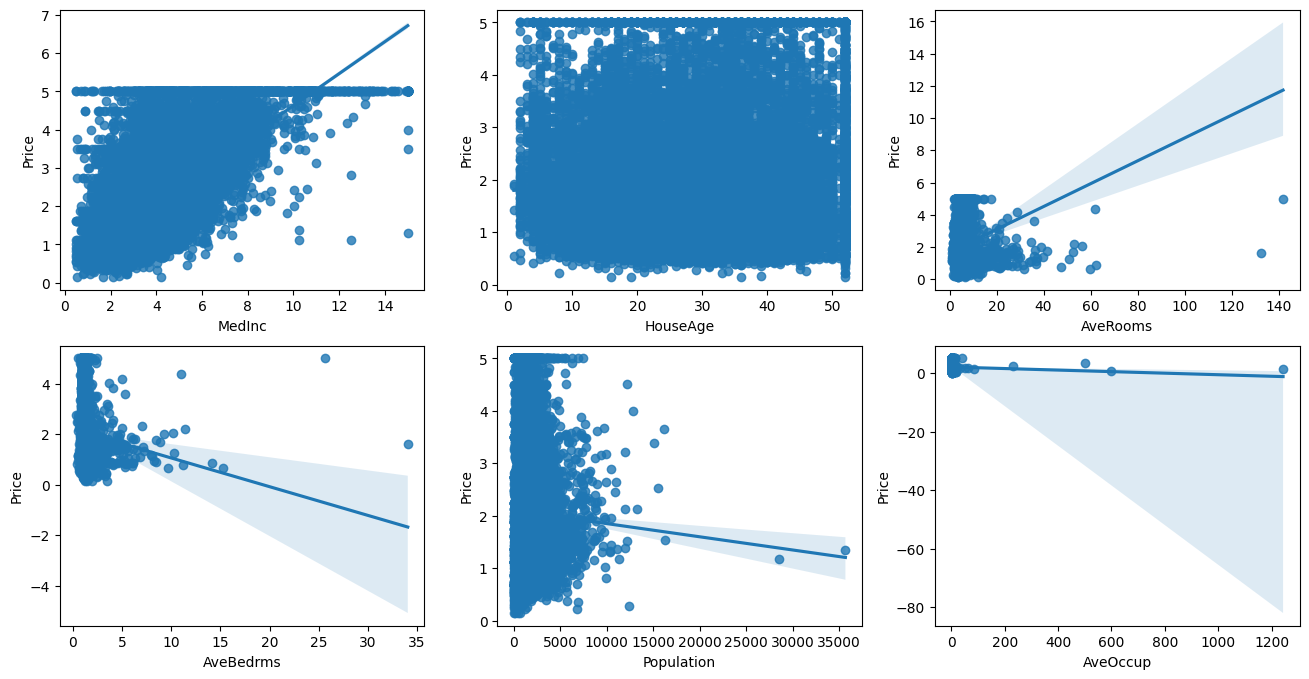

In [ ]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=3, nrows=2)
lm_features = housing.feature_names[:-2]

for i, feature in enumerate(lm_features):
    row = int(i/3)
    col = i%3

    # regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='Price', data=housing_df, ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_data = housing_df.iloc[:, :-1]
y_target = housing_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)                # 학습

LinearRegression()

In [ ]:
# 예측 시작
y_pred = lr.predict(X_test)
y_pred

array([1.00516269, 1.5625964 , 2.67258851, ..., 2.09904154, 1.6899986 ,
       1.87039695])

In [ ]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

n = len(housing_df)
k = len(housing_df.columns) - 1

adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

n : 데이터 개수

k : 독립변수의 개수

In [ ]:
print('MSE :', mse)
print('RMSE :', rmse)
print('r2 :', r_squared)
print('adj_r2 :', adjusted_r_squared)

MSE : 0.616443088540512
RMSE : 0.7851388976101693
r2 : 0.5303434273202932
adj_r2 : 0.5302068529280051


In [ ]:
print('절편 값 :', lr.intercept_)
print('회귀 계수값 :', np.round(lr.coef_, 4))

절편 값 : -0.5516648824670325
회귀 계수값 : [ 0.5424  0.0168 -0.2208  1.1078  0.     -0.0045]


In [ ]:
coeff = pd.Series(data=np.round(lr.coef_, 4), index=X_data.columns)
coeff.sort_values(ascending=False)

AveBedrms     1.1078
MedInc        0.5424
HouseAge      0.0168
Population    0.0000
AveOccup     -0.0045
AveRooms     -0.2208
dtype: float64

교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = housing_df.iloc[:, -1]
X_data = housing_df.iloc[:, :-1]
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)                                                          # 반환값이 음수이기때문에 -1을 곱해준다.
avg_rmse = np.mean(rmse_scores)

In [ ]:
print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores, 4))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores, 4))
print('5 folds의 평균 RMSE :', np.round(avg_rmse, 4))

5 folds의 개별 Negative MSE scores : [-0.523  -0.6541 -0.706  -0.6397 -0.678 ]
5 folds의 개별 RMSE scores : [0.7232 0.8087 0.8402 0.7998 0.8234]
5 folds의 평균 RMSE : 0.7991
